- import the attached datasets (Table1 and Table2) hint: table1 = pd.read_excel('datasets/Health_Outcomes_merge.xlsx', sheet_name='Table1') second sheet: Table2
- inspect the shape of each dataset
- merge the 2 datasets using an inner join and call it inner_join_df -  document your observation (find the common columns)
- merge the 2 datasets using an outer join and document your observations
- merge the 2 datasets using a left join and document your observations
- Use the inner_join_df and rename the date column to record_date
- Build a histogram for each column (inner_join_df)
- Build a new dataset (call it my_summary) where BMI is greater than 23 and Diet is greater than 19

In [3]:
import pandas as pd

In [14]:
table1 = pd.read_excel('./Health_Outcomes_merge.xlsx', sheet_name='Table1')
table2 = pd.read_excel('./Health_Outcomes_merge.xlsx', sheet_name='Table2')

In [8]:
# table1.shape
# table1.columns

Index(['PersonID', 'Diet', 'Exercise', 'Sleep', 'Date'], dtype='object')

In [9]:
table1.head()

,PersonID,Diet,Exercise,Sleep,Date
0,AT71637,26,94,6,2023-03-03
1,AT95706,25,55,7,2023-03-10
2,AT74132,18,42,8,2023-03-16
3,AT233295,15,52,8,2023-03-24
4,AT104243,24,94,7,2023-03-30


In [11]:
table1.dtypes

PersonID            object
Diet                 int64
Exercise             int64
Sleep                int64
Date        datetime64[ns]
dtype: object

In [15]:
table2.head()

,PersonID,BMI,Cholesterol,BloodPressure,Date
0,AT71637,23,190,139,2023-03-03
1,AT95706,26,193,151,2023-03-10
2,AT74132,32,249,134,2023-03-16
3,AT233295,30,180,130,2023-03-24
4,AT104243,28,216,101,2023-03-30


In [17]:
# table2.shape
# table1.shape

(57, 5)

In [19]:
# table1.nunique() == len(table1)
table2.nunique() == len(table2)

PersonID          True
BMI              False
Cholesterol      False
BloodPressure    False
Date              True
dtype: bool

In [27]:
table2.duplicated().sum()

0

In [20]:
inner_join_df = pd.merge(table1, table2, how='inner', on=['PersonID', 'Date'])

In [23]:
# inner_join_df.head()
inner_join_df.shape

(48, 8)

In [28]:
inner_join_df.duplicated().sum()

0

In [22]:
inner_join_df.isna().sum()

PersonID         0
Diet             0
Exercise         0
Sleep            0
Date             0
BMI              0
Cholesterol      0
BloodPressure    0
dtype: int64

In [29]:
outer_join_df = pd.merge(table1, table2, how="outer", on=['PersonID', 'Date'])
outer_join_df.head()

,PersonID,Diet,Exercise,Sleep,Date,BMI,Cholesterol,BloodPressure
0,AT71637,26.0,94.0,6.0,2023-03-03,23.0,190.0,139.0
1,AT95706,25.0,55.0,7.0,2023-03-10,26.0,193.0,151.0
2,AT74132,18.0,42.0,8.0,2023-03-16,32.0,249.0,134.0
3,AT233295,15.0,52.0,8.0,2023-03-24,30.0,180.0,130.0
4,AT104243,24.0,94.0,7.0,2023-03-30,28.0,216.0,101.0


In [30]:
outer_join_df.shape

(62, 8)

In [31]:
outer_join_df[outer_join_df.isnull().any(axis=1)]

,PersonID,Diet,Exercise,Sleep,Date,BMI,Cholesterol,BloodPressure
9,AT176840,15.0,77.0,8.0,2023-05-03,NaN,NaN,NaN
10,AT132447,21.0,82.0,8.0,2023-05-11,NaN,NaN,NaN
11,AT256140,14.0,43.0,6.0,2023-05-19,NaN,NaN,NaN
12,AT116982,17.0,57.0,8.0,2023-05-26,NaN,NaN,NaN
13,AT154588,14.0,49.0,6.0,2023-06-03,NaN,NaN,NaN
14,AT23949,14.0,78.0,6.0,2023-06-09,NaN,NaN,NaN
15,AT49973,23.0,37.0,7.0,2023-06-16,NaN,NaN,NaN
16,AT197445,15.0,74.0,8.0,2023-06-23,NaN,NaN,NaN
17,AT174156,22.0,88.0,8.0,2023-06-30,NaN,NaN,NaN
57,AT43596,NaN,NaN,NaN,2024-04-04,27.0,240.0,126.0


In [32]:
left_join_df = pd.merge(table1, table2, how="left", on=["PersonID", "Date"])
left_join_df.shape

(57, 8)

In [34]:
# record_date
inner_join_df = inner_join_df.rename(columns={
  "Date": "record_date"
})
inner_join_df.columns

Index(['PersonID', 'Diet', 'Exercise', 'Sleep', 'record_date', 'BMI',
       'Cholesterol', 'BloodPressure'],
      dtype='object')

array([[<Axes: title={'center': 'Diet'}>,
        <Axes: title={'center': 'Exercise'}>],
       [<Axes: title={'center': 'Sleep'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'BloodPressure'}>]], dtype=object)

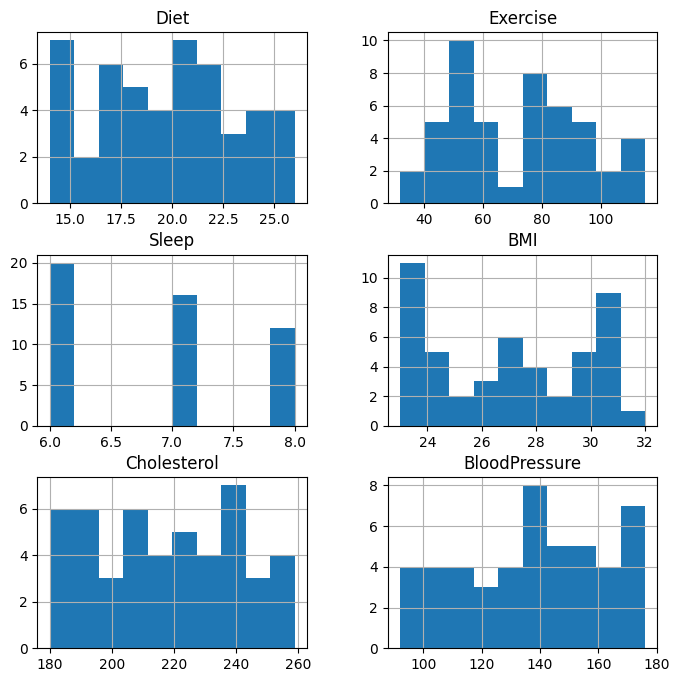

In [40]:
inner_join_df[['Diet', 'Exercise', 'Sleep', 'BMI',
       'Cholesterol', 'BloodPressure']].hist(figsize=(8,8))

In [45]:
# Build a new dataset (call it my_summary)
# where BMI is greater than 23 and Diet is greater than 19

mask = (inner_join_df['BMI'] > 23) & (inner_join_df['Diet'] > 19)
my_summary = inner_join_df[mask]
my_summary.head()
# my_summary.shape


,PersonID,Diet,Exercise,Sleep,record_date,BMI,Cholesterol,BloodPressure
1,AT95706,25,55,7,2023-03-10,26,193,151
4,AT104243,24,94,7,2023-03-30,28,216,101
10,AT122014,24,89,6,2023-07-14,28,259,140
11,AT185052,22,36,6,2023-07-21,29,217,125
13,AT64864,26,48,8,2023-08-05,31,259,171


## Observations
- Found two unique columns: PersonID, Date to merge on
- Did a check for null values and found none
- Found that inner_join_df has fewer rows than the sum of table1 + table2 because NaN values caused those rows to be dropped
- outer_join_df has all the rows with data from all the columns, padding columns with NaN if there is no value
- left_join_df has the same number of rows as table1, dropping rows that are not present in table2
- Used Pandas default `hist()` function
- Histograms alone leave us with more questions than answers, as we don't know yet how any of these varliables interact with each other